This notebooks is in serious need of a cleanup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvDirectory = './results'

csvList = [
    'BDT_cv_results_1000.csv',
    'BDT_cv_results_50.csv',
    'BDT_cv_results_200.csv'
]

In [3]:
dfList = []
for csvFile in csvList:
    dfList.append(pd.read_csv(csvDirectory + '/' + csvFile))

In [4]:
cv_results = pd.concat(dfList, ignore_index=True)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,226.229918,1.830580,0.774533,0.004358,0.05,4,3,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986105,0.001075,71,0.990231,0.990535,0.990323,0.990406,0.990895,0.990478,2.311162e-04
1,298.500991,2.478069,0.780355,0.002986,0.05,4,3,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.985962,0.000696,75,0.990383,0.990501,0.990422,0.990670,0.990889,0.990573,1.861632e-04
2,395.390282,1.915170,0.747245,0.004805,0.05,4,6,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986274,0.000958,69,0.991333,0.991075,0.991387,0.991508,0.991562,0.991373,1.701271e-04
3,551.139926,3.687109,0.752132,0.003622,0.05,4,6,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986597,0.001068,64,0.991314,0.991314,0.991326,0.991433,0.991450,0.991368,6.083522e-05
4,567.968875,1.856511,0.737456,0.002027,0.05,4,9,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986380,0.001335,67,0.991533,0.991836,0.991800,0.992179,0.992039,0.991878,2.206998e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,261.876954,4.955807,0.857446,0.005086,0.20,14,3,200,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.987179,0.000724,31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
320,273.227178,3.052287,0.729786,0.025842,0.20,14,6,200,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.986908,0.000683,40,0.999389,1.000000,1.000000,0.999827,1.000000,0.999843,2.368622e-04
321,383.959011,3.712739,0.777169,0.002543,0.20,14,6,200,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.987234,0.000812,26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
322,368.079808,1.695745,0.695670,0.015448,0.20,14,9,200,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.986884,0.000998,41,1.000000,1.000000,1.000000,1.000000,0.999682,0.999936,1.272145e-04


In [5]:
list(cv_results)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_learning_rate',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'param_subsample',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [6]:
def transform_cv_results(cv_results, params, nsplits=5):
    test_scores = cv_results.loc[:, params + [f'split{i}_test_score' for i in range(nsplits)]]
    test_scores.set_index(params, inplace=True)
    test_scores.rename({f'split{i}_test_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    test_scores = pd.DataFrame(test_scores.stack()).rename({0 : 'score'}, axis='columns')
    test_scores['dataset'] = 'test'
    test_scores.set_index('dataset', inplace=True, append=True)
    test_scores.index.set_names(names='split', level=len(params), inplace=True)

    train_scores = cv_results.loc[:, params + [f'split{i}_train_score' for i in range(nsplits)]]
    train_scores.set_index(params, drop=True, inplace=True)
    train_scores.rename({f'split{i}_train_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    train_scores = pd.DataFrame(train_scores.stack()).rename({0 : 'score'}, axis='columns')
    train_scores['dataset'] = 'train'
    train_scores.set_index('dataset', inplace=True, append=True)
    train_scores.index.set_names(names='split', level=len(params), inplace=True)

    return pd.concat([test_scores, train_scores]).reset_index()

In [7]:
cv_results['diff_score'] = cv_results['mean_train_score'] - cv_results['mean_test_score']

In [8]:
parameters = {'max_depth'        : list(range(4, 15, 2)),
              'max_features'     : [3, 6, 9],
              'learning_rate'    : [0.05, 0.1, 0.2],
              'subsample'        : [0.7, 1.0],
              'n_estimators'     : [50, 1000, 200]
} #500

In [9]:
cv_results_scores = transform_cv_results(cv_results, [f'param_{name}' for name in parameters.keys()])

In [10]:
cv_results_scores.set_index([f'param_{name}' for name in parameters.keys()] + ['split', 'dataset'], inplace=True)

In [11]:
cv_results_scores_train = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
cv_results_scores_test = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
cv_results_scores_diff = (cv_results_scores_train - cv_results_scores_test)

In [12]:
cv_results_scores['score difference'] = cv_results_scores_diff['score']

In [13]:
cv_results_scores.reset_index(inplace=True)
cv_results_scores.rename({'param_max_depth' : 'max depth', 
                          'param_max_features' : 'max features per split node',
                          'param_learning_rate' : 'learning rate',
                          'param_subsample' : 'sub sample per split node',
                          'param_n_estimators' : '# of trees'
}, inplace=True, axis='columns')

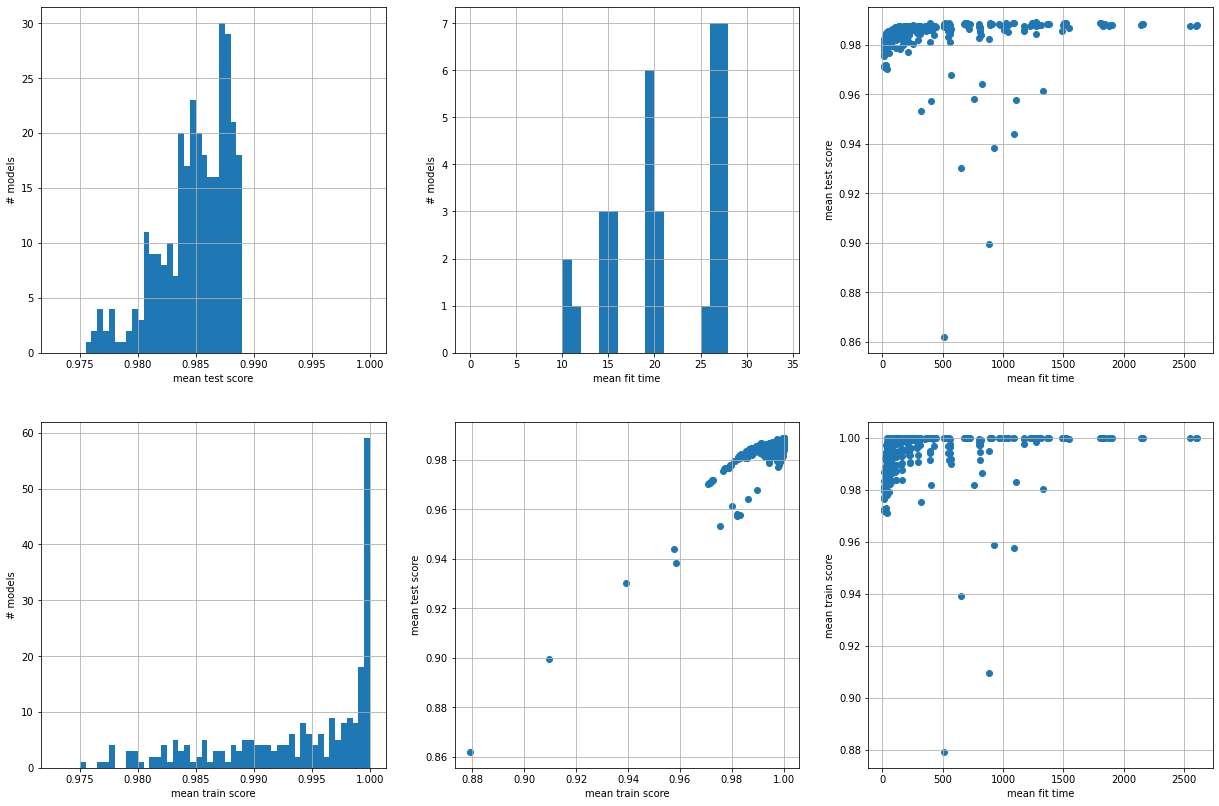

In [14]:
plt.figure(figsize=(21,14))

score_bins = np.arange(0.973, 1, 0.0005)
time_bins = np.arange(0, 35, 1)

plt.subplot(2, 3, 1)
plt.hist(cv_results['mean_test_score'], bins=score_bins)
plt.xlabel("mean test score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 2)
plt.hist(cv_results['mean_fit_time'], bins=time_bins)
plt.xlabel("mean fit time")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_test_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 4)
plt.hist(cv_results['mean_train_score'], bins=score_bins)
plt.xlabel("mean train score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(cv_results['mean_train_score'], cv_results['mean_test_score'])
plt.xlabel("mean train score")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_train_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean train score")
plt.grid()

plt.show()

In [15]:
cv_results.loc[cv_results['mean_test_score'] > 0.985, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('diff_score')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
224,0.985405,0.000775,0.989443,109.633930,0.004038,0.05,6,6,200,0.7
225,0.985400,0.000757,0.989624,153.058514,0.004223,0.05,6,6,200,1.0
226,0.985652,0.000823,0.989990,157.496367,0.004338,0.05,6,9,200,0.7
0,0.986105,0.001075,0.990478,226.229918,0.004373,0.05,4,3,1000,0.7
227,0.985594,0.000982,0.990123,224.066612,0.004529,0.05,6,9,200,1.0
...,...,...,...,...,...,...,...,...,...,...
83,0.985342,0.002238,1.000000,1175.974631,0.014658,0.20,6,9,1000,1.0
213,0.985321,0.000822,1.000000,98.684002,0.014679,0.20,14,6,50,1.0
215,0.985280,0.000909,1.000000,131.733195,0.014720,0.20,14,9,50,1.0
175,0.985150,0.001051,0.999965,72.397692,0.014815,0.10,14,3,50,1.0


In [16]:
cv_results.loc[cv_results['mean_test_score'] > 0.9855, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('mean_fit_time')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
211,0.985585,0.000760,1.000000,67.361164,0.014415,0.20,14,3,50,1.0
228,0.986502,0.000850,0.993846,79.051296,0.007343,0.05,8,3,200,0.7
264,0.985953,0.000655,0.997052,79.482724,0.011099,0.10,8,3,200,0.7
234,0.987179,0.000899,0.998354,102.094604,0.011174,0.05,10,3,200,0.7
270,0.986797,0.001017,0.999878,102.686779,0.013080,0.10,10,3,200,0.7
...,...,...,...,...,...,...,...,...,...,...
65,0.988165,0.000946,1.000000,2147.792261,0.011835,0.10,12,9,1000,1.0
29,0.988323,0.000899,1.000000,2158.463967,0.011677,0.05,12,9,1000,1.0
107,0.987668,0.000880,1.000000,2552.014244,0.012332,0.20,14,9,1000,1.0
71,0.987700,0.000944,1.000000,2601.767208,0.012300,0.10,14,9,1000,1.0
